In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import random

In [48]:
data = []
labels = []
details = []
cur_path = os.getcwd()
classes = 43

In [49]:
for i in range(classes): 
    path = os.path.join(cur_path, 'dataset', 'train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(path+"\\"+a) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i)
            details.append({
                "full_path": path+"\\"+a,
                "image_name": a,
                "category": i
            })
        except: 
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [50]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [51]:
detail_df = pd.DataFrame(details)
detail_df.head()

,full_path,image_name,category
0,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00000.png,0
1,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00001.png,0
2,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00002.png,0
3,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00003.png,0
4,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00004.png,0


In [52]:
sign_df = pd.read_csv("./signnames.csv")
sign_dict = sign_df.to_dict()
sign_list = [item for item in sign_dict['SignName'].values()]

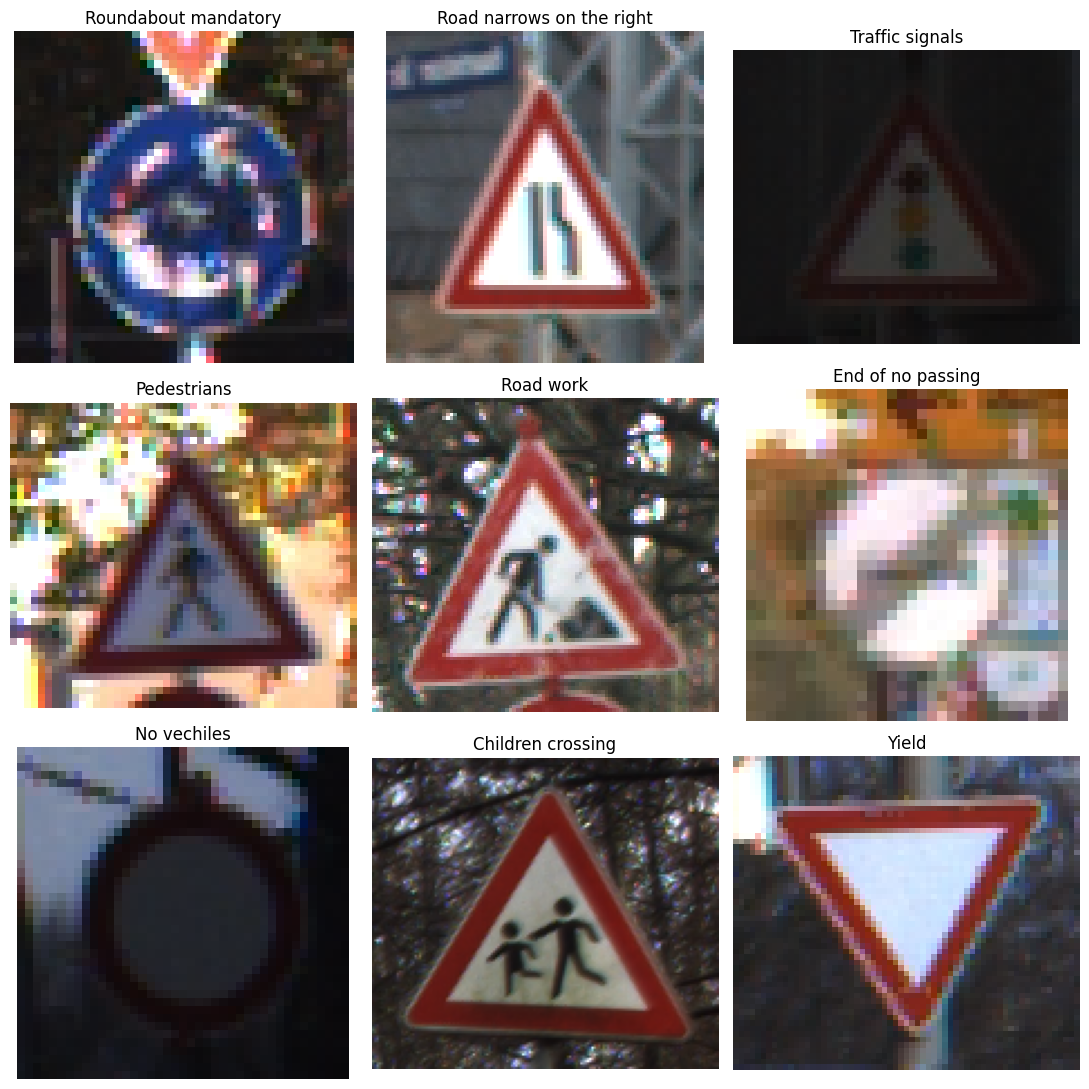

In [53]:
Image_dir = './dataset/Train/'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)
fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    sample_dir_path = os.path.join(Image_dir, image)
    sample_dir_list = os.listdir(sample_dir_path)
    random_image = random.choice(sample_dir_list)
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(sample_dir_path,random_image)))
    ax.set_title(sign_list[int(image)])
    ax.axis('off')

plt.tight_layout()
plt.show()

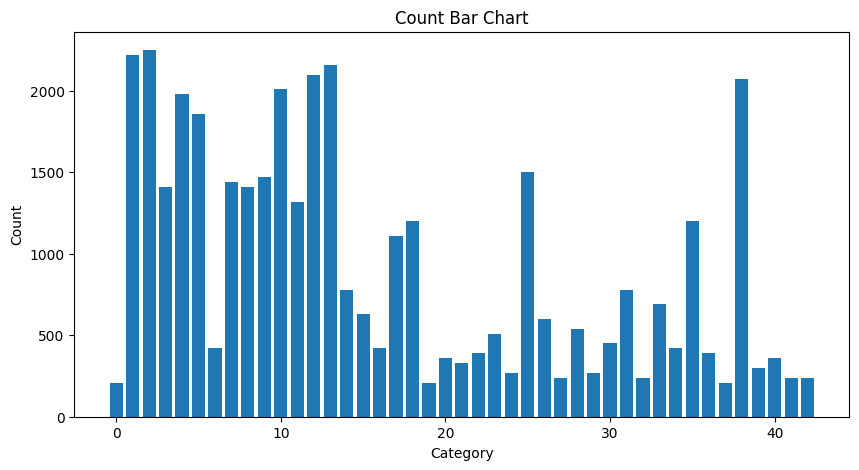

In [54]:
value_counts = detail_df['category'].value_counts()

plt.figure(figsize=(10,5))
# Plotting
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Bar Chart')
plt.show()

In [55]:
# Top 10 Category
display(value_counts.head(10))

category
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
Name: count, dtype: int64

- The count of id's 1,2,4,10,12,13 and 38 are high in number when compared to other sign id's.
- The sign id's 0,19,31 and 38 are least in number.

In [56]:
#assigning class id's under the category mentioned in research paper.
prohibitory = [0,1,2,3,4,5,7,8,9,10,15,16]
danger = [11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
mandatory = [33,34,35,36,37,38,39,40]
other = [6,12,13,14,17,32,41,42]

In [ ]:
df = detail_df['category']
detail_df['Object Name'] = detail_df['category']
#assigning new labels, 1 implies prohibitory,2 implies danger,3 implies mandatory and 4 implies other.
for i in range(len(df)):
  if(df[i] in prohibitory):
    df.loc[i]=0
    detail_df['Object Name'].loc[i]='prohibitory'
  elif(df[i] in danger):
    df.loc[i]=1
    detail_df['Object Name'].loc[i]='danger'
  elif(df[i] in mandatory):
    df.loc[i]=2
    detail_df['Object Name'].loc[i]='mandatory'
  elif(df[i] in other):
    df.loc[i]=3
    detail_df['Object Name'].loc[i]='other'
  else:
    df.loc[i]=-1

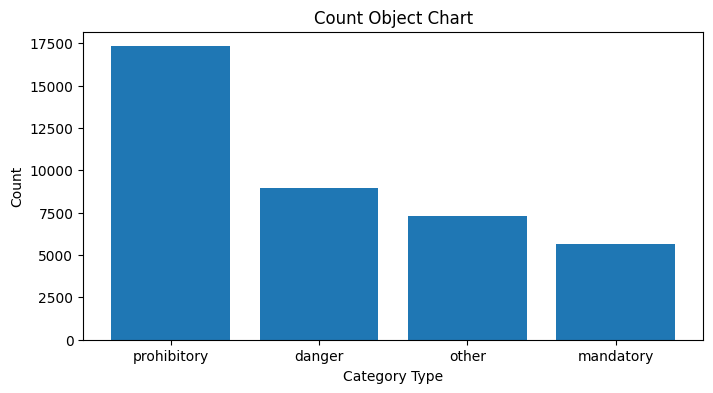

In [69]:
# display(detail_df)
value_counts = detail_df['Object Name'].value_counts()

plt.figure(figsize=(8,4))
# Plotting
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Category Type')
plt.ylabel('Count')
plt.title('Count Object Chart')
plt.show()

In [59]:
detail_df.head()

,full_path,image_name,category,Object Name
0,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00000.png,0,prohibitory
1,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00001.png,0,prohibitory
2,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00002.png,0,prohibitory
3,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00003.png,0,prohibitory
4,d:\Programs\neural_network\dataset\train\0\000...,00000_00000_00004.png,0,prohibitory


In [60]:
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [61]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [62]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape= X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [65]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))
model.save("./model/init_model.h5")


Epoch 1/15


981/981 [==============================] - 19s 18ms/step - loss: 2.0898 - accuracy: 0.4425 - val_loss: 0.7833 - val_accuracy: 0.7802
Epoch 2/15
981/981 [==============================] - 17s 17ms/step - loss: 0.8895 - accuracy: 0.7346 - val_loss: 0.4577 - val_accuracy: 0.8791
Epoch 3/15
981/981 [==============================] - 17s 18ms/step - loss: 0.5542 - accuracy: 0.8368 - val_loss: 0.1974 - val_accuracy: 0.9415
Epoch 4/15
981/981 [==============================] - 17s 17ms/step - loss: 0.4261 - accuracy: 0.8740 - val_loss: 0.1300 - val_accuracy: 0.9616
Epoch 5/15
981/981 [==============================] - 16s 16ms/step - loss: 0.3438 - accuracy: 0.8995 - val_loss: 0.1134 - val_accuracy: 0.9684
Epoch 6/15
981/981 [==============================] - 17s 17ms/step - loss: 0.2888 - accuracy: 0.9159 - val_loss: 0.1054 - val_accuracy: 0.9689
Epoch 7/15
981/981 [==============================] - 17s 17ms/step - loss: 0.2835 - accuracy: 0.9189 - val_loss: 0.0735 - val_accura

d:\Programs\neural_network\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
print(anc.history)

{'loss': [2.089801788330078, 0.8894758820533752, 0.554175853729248, 0.4261457920074463, 0.3437558114528656, 0.28879496455192566, 0.2835412919521332, 0.25982117652893066, 0.24519217014312744, 0.2612667977809906, 0.24520522356033325, 0.23577505350112915, 0.24368084967136383, 0.2403753250837326, 0.24482935667037964], 'accuracy': [0.44250327348709106, 0.7345936894416809, 0.8368030190467834, 0.8740077018737793, 0.8994803428649902, 0.9158669710159302, 0.9188637733459473, 0.9272483587265015, 0.9290336966514587, 0.9271527528762817, 0.9318391680717468, 0.9361431002616882, 0.9351866841316223, 0.9343896508216858, 0.9355054497718811], 'val_loss': [0.7832927703857422, 0.4576995372772217, 0.19737643003463745, 0.13003113865852356, 0.11335732787847519, 0.10541415959596634, 0.0735429972410202, 0.06697412580251694, 0.07070557028055191, 0.16022375226020813, 0.0783136859536171, 0.07908393442630768, 0.08283494412899017, 0.12596601247787476, 0.08777103573083878], 'val_accuracy': [0.7801581025123596, 0.87911

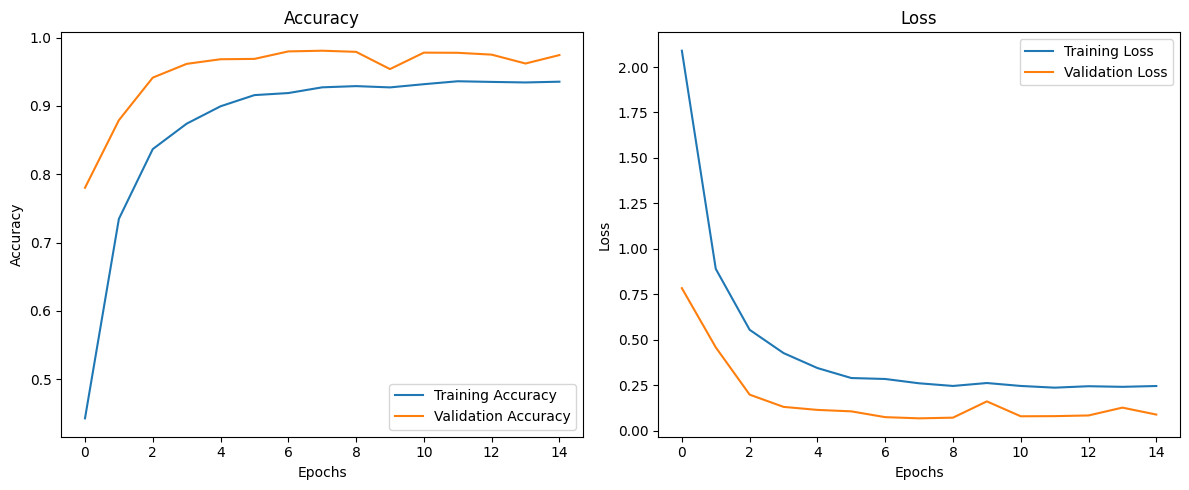

In [70]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(anc.history['accuracy'], label='Training Accuracy')
plt.plot(anc.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(anc.history['loss'], label='Training Loss')
plt.plot(anc.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [71]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('./dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open("./dataset/" + img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)

395/395 [==============================] - 2s 5ms/step


In [72]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
# Convert probabilities to class labels by taking the argmax
pred_labels = np.argmax(pred, axis=1)
print("Accuracy:",accuracy_score(labels, pred_labels))
model.save('./model/traffic_classifier.h5')

Accuracy: 0.9410926365795724


d:\Programs\neural_network\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
